### This Project aims to analyse schoolzones and the no. of road objects within a 100m buffer of the school. This data can be further used for further analysis and investigation, in relation to accident/near miss data in the school zones

In [ ]:
#data manipulation libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

#geospatial libraries
import geopandas as gpd

#to remove warnings during output
import warnings
warnings.filterwarnings("ignore")

In [64]:
schoolzone = gpd.read_file("./datasets/SCHOOLZONE.shp")

In [65]:
schoolzone.head()

,SITENAME,INC_CRC,FMEL_UPD_D,geometry
0,Tampines North Primary School,F3A9A20A,2016-03-29,"POLYGON ((40842.783 38015.203, 40867.289 38008..."
1,Chij (Katong) Primary School,54B7FF5E,2016-03-29,"POLYGON ((36626.088 32204.211, 36651.952 32137..."
2,Metta School,2B880636,2016-03-29,"POLYGON ((41683.217 36527.433, 41853.609 36513..."
3,Opera Estate Primary School,A838D0F7,2016-03-29,"POLYGON ((37908.34 33502.636, 37925.13 33501.1..."
4,Minds-Towner Gdns School,86AC26B3,2016-03-29,"POLYGON ((36946.941 34367.412, 36947.542 34337..."


In [66]:
schoolzone.rename(columns={"SITENAME":"School"}, inplace=True)
schoolzone.drop(columns=["INC_CRC", "FMEL_UPD_D"], inplace=True)

In [67]:
schoolzone.head()

,School,geometry
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008..."
1,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137..."
2,Metta School,"POLYGON ((41683.217 36527.433, 41853.609 36513..."
3,Opera Estate Primary School,"POLYGON ((37908.34 33502.636, 37925.13 33501.1..."
4,Minds-Towner Gdns School,"POLYGON ((36946.941 34367.412, 36947.542 34337..."


In [68]:
print(schoolzone.crs)

PROJCS["SVY21",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",1.36666666666667],PARAMETER["central_meridian",103.833333333333],PARAMETER["scale_factor",1],PARAMETER["false_easting",28001.642],PARAMETER["false_northing",38744.572],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [69]:
schoolzone["buffer_100m"] = schoolzone.geometry.buffer(100)

schoolzone = schoolzone.set_geometry("buffer_100m")

In [70]:
schoolzone.head(14)

,School,geometry,buffer_100m
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058..."
1,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137...","POLYGON ((36600.091 32300.772, 36609.614 32302..."
2,Metta School,"POLYGON ((41683.217 36527.433, 41853.609 36513...","POLYGON ((41583.244 36529.731, 41583.923 36539..."
3,Opera Estate Primary School,"POLYGON ((37908.34 33502.636, 37925.13 33501.1...","POLYGON ((37808.381 33505.492, 37809.116 33515..."
4,Minds-Towner Gdns School,"POLYGON ((36946.941 34367.412, 36947.542 34337...","POLYGON ((36835.779 34261.077, 36835.376 34272..."
5,St Andrew's Autism School,"POLYGON ((38805.945 32710.946, 38807.808 32696...","POLYGON ((38797.843 32810.618, 38807.365 32810..."
6,Punggol Primary School,"POLYGON ((34671.719 39886.24, 34738.394 39885....","POLYGON ((34571.778 39882.794, 34571.937 39892..."
7,Ang Mo Kio Primary School,"POLYGON ((28834.602 39093.503, 28822.96 39051....","POLYGON ((28845.35 39192.924, 28854.867 39191...."
8,Pathlight School (Campus 1),"POLYGON ((30282.561 37868.739, 30291.463 37872...","POLYGON ((30197.233 37816.594, 30192.472 37825..."
9,Pathlight School (Campus 2),"POLYGON ((30792.161 38735.705, 30810.364 38717...","POLYGON ((30723.499 38808.406, 30730.814 38814..."


In [71]:
schoolzone.groupby("School").size().sort_values(ascending=False).head(10)

School
ACS (Primary) School             2
Ai Tong School                   2
Balestier Hill Primary School    2
Haig Girls' School               2
Singapore American School        2
Ahmad Ibrahim Primary School     1
Alexandra Primary School         1
Anchor Green Primary School      1
Ang Mo Kio Primary School        1
Anderson Primary School          1
dtype: int64

In [72]:
roadcrossing = gpd.read_file("./datasets/ROADCROSSING.shp")


roadcrossing.head()

,OBJECTID,geometry
0,133,"LINESTRING (34190.201 33964.826, 34193.318 339..."
1,134,"LINESTRING (41580.37 37860.818, 41580.372 3784..."
2,135,"LINESTRING (34191.702 33977.343, 34186.946 339..."
3,136,"LINESTRING (34186.309 34051.694, 34173.199 340..."
4,137,"LINESTRING (41583.916 37841.023, 41600.305 378..."


In [73]:

roadcrossing.describe()

,OBJECTID
count,9641.000000
mean,4959.742558
std,3141.920071
min,1.000000
25%,2426.000000
50%,4844.000000
75%,7264.000000
max,22404.000000


In [74]:
roadcrossing.head()

,OBJECTID,geometry
0,133,"LINESTRING (34190.201 33964.826, 34193.318 339..."
1,134,"LINESTRING (41580.37 37860.818, 41580.372 3784..."
2,135,"LINESTRING (34191.702 33977.343, 34186.946 339..."
3,136,"LINESTRING (34186.309 34051.694, 34173.199 340..."
4,137,"LINESTRING (41583.916 37841.023, 41600.305 378..."


In [75]:
roadcrossing_near_school = gpd.sjoin(schoolzone, roadcrossing, how="left", predicate="intersects")

In [76]:
roadcrossing_near_school.head()

,School,geometry,buffer_100m,index_right,OBJECTID
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",1049.0,1040.0
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",1059.0,1050.0
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",1055.0,1046.0
1,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137...","POLYGON ((36600.091 32300.772, 36609.614 32302...",NaN,NaN
2,Metta School,"POLYGON ((41683.217 36527.433, 41853.609 36513...","POLYGON ((41583.244 36529.731, 41583.923 36539...",2254.0,2305.0


In [77]:
roadcrossing

,OBJECTID,geometry
0,133,"LINESTRING (34190.201 33964.826, 34193.318 339..."
1,134,"LINESTRING (41580.37 37860.818, 41580.372 3784..."
2,135,"LINESTRING (34191.702 33977.343, 34186.946 339..."
3,136,"LINESTRING (34186.309 34051.694, 34173.199 340..."
4,137,"LINESTRING (41583.916 37841.023, 41600.305 378..."
...,...,...
9636,9293,"LINESTRING (29500.595 33896.801, 29516.187 338..."
9637,22401,"LINESTRING (29372.143 33947.039, 29384.41 3394..."
9638,22402,"LINESTRING (29390.515 33947.104, 29393.987 339..."
9639,22403,"LINESTRING (29380.224 33975.969, 29390.967 339..."


In [78]:
roadcrossing_near_school.count()

School         1235
geometry       1235
buffer_100m    1235
index_right    1230
OBJECTID       1230
dtype: int64

In [79]:
roadcrossing_near_school.groupby("School").size().sort_values(ascending=False)

School
Yio Chu Kang Primary School               18
Punggol Green Primary School              18
Edgefield Primary School                  17
Punggol Primary School                    17
Anchor Green Primary School               17
                                          ..
St. Joseph's Institution Junior            1
ST STEPHEN'S PRIMARY SCHOOL                1
Seng Kang Primary School                   1
St Andrew's Autism School                  1
St. Anthony's Canossian Primary School     1
Length: 206, dtype: int64

In [80]:
roadcrossing_near_school["object_type"] = "Road Crossing"
roadcrossing_near_school.rename(columns={"index_right": "object_index"}, inplace=True)

In [81]:
roadcrossing_near_school.head()

,School,geometry,buffer_100m,object_index,OBJECTID,object_type
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",1049.0,1040.0,Road Crossing
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",1059.0,1050.0,Road Crossing
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",1055.0,1046.0,Road Crossing
1,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137...","POLYGON ((36600.091 32300.772, 36609.614 32302...",NaN,NaN,Road Crossing
2,Metta School,"POLYGON ((41683.217 36527.433, 41853.609 36513...","POLYGON ((41583.244 36529.731, 41583.923 36539...",2254.0,2305.0,Road Crossing


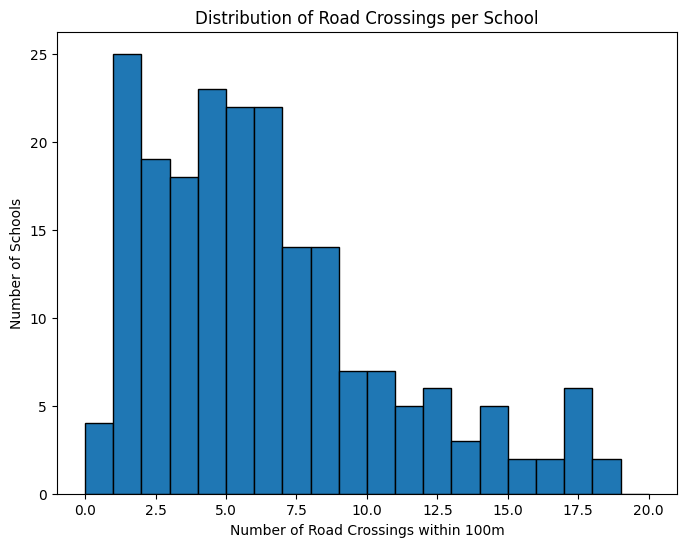

In [82]:
roadcrossing_near_school.groupby("School")["OBJECTID"].count().plot.hist(
    bins=range(0, roadcrossing_near_school.groupby("School")["OBJECTID"].count().max() + 3), 
    edgecolor="black",
    figsize=(8,6)
)

plt.title("Distribution of Road Crossings per School")
plt.xlabel("Number of Road Crossings within 100m")
plt.ylabel("Number of Schools")
plt.show()

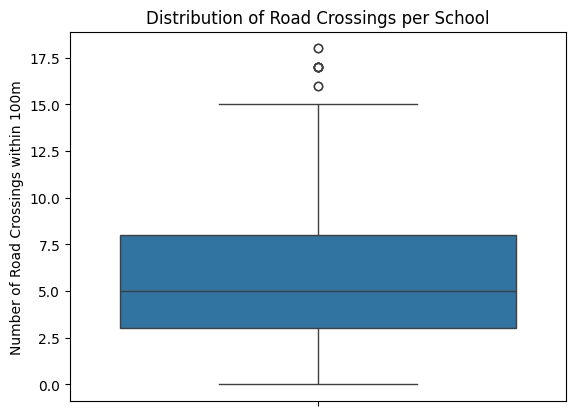

In [132]:
sns.boxplot(roadcrossing_near_school.groupby("School")["OBJECTID"].count())

plt.title("Distribution of Road Crossings per School")
plt.ylabel("Number of Road Crossings within 100m")
plt.show()

In [148]:
roadcrossing_near_school.groupby("School")["OBJECTID"].count().describe()

count    206.000000
mean       5.970874
std        4.292833
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       18.000000
Name: OBJECTID, dtype: float64

In [83]:
roadhump=gpd.read_file("./datasets/ROADHUMP.shp")

roadhump.head()

,OBJECTID,geometry
0,133,"LINESTRING (33468.503 38251.788, 33473.711 382..."
1,134,"LINESTRING (42809.978 38244.819, 42814.594 382..."
2,135,"LINESTRING (33456.089 38245.823, 33458.654 382..."
3,136,"LINESTRING (20778.211 39830.567, 20782.529 398..."
4,137,"LINESTRING (32111.754 38233.47, 32115.463 3822..."


In [84]:
roadhump.describe()

,OBJECTID
count,3768.000000
mean,1917.590499
std,1196.027449
min,1.000000
25%,945.750000
50%,1889.500000
75%,2834.250000
max,10562.000000


In [85]:
roadhump_near_school = gpd.sjoin(schoolzone, roadhump, how="left", predicate="intersects")

In [86]:
roadhump_near_school.head()

,School,geometry,buffer_100m,index_right,OBJECTID
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",3345.0,3411.0
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",2395.0,2654.0
1,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137...","POLYGON ((36600.091 32300.772, 36609.614 32302...",733.0,753.0
1,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137...","POLYGON ((36600.091 32300.772, 36609.614 32302...",456.0,439.0
1,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137...","POLYGON ((36600.091 32300.772, 36609.614 32302...",407.0,191.0


In [87]:
roadhump_near_school.groupby("School").size().sort_values(ascending=False)

School
Nanyang Primary Schoo          13
Singapore American School      10
Nanyang Primary School          9
Pathlight School (Campus 2)     9
Ai Tong School                  8
                               ..
Xinghua Primary School          1
Yu Neng Primary School          1
Yio Chu Kang Primary School     1
Yew Tee Primary School          1
Zhenghua Primary School         1
Length: 206, dtype: int64

In [88]:
roadhump_near_school["object_type"] = "Road Hump"
roadhump_near_school.rename(columns={"index_right": "object_index"}, inplace=True)

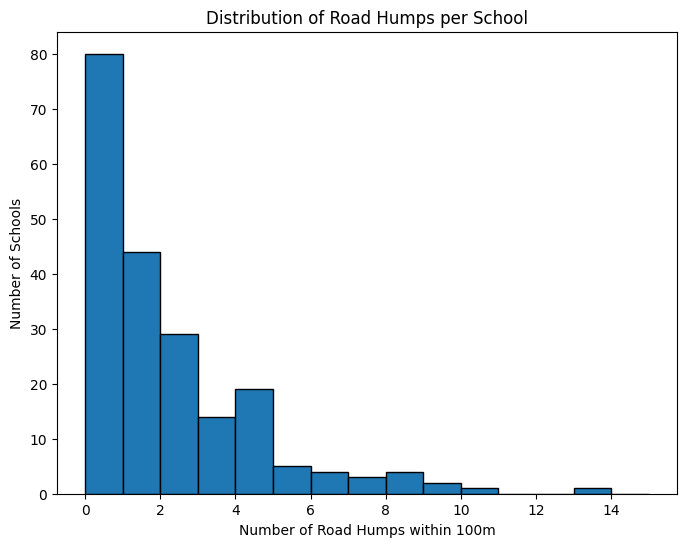

In [89]:
roadhump_near_school.groupby("School")["OBJECTID"].count().plot.hist(
    bins=range(0, roadhump_near_school.groupby("School")["OBJECTID"].count().max() + 3), 
    edgecolor="black",
    figsize=(8,6)
)

plt.title("Distribution of Road Humps per School")
plt.xlabel("Number of Road Humps within 100m")
plt.ylabel("Number of Schools")
plt.show()

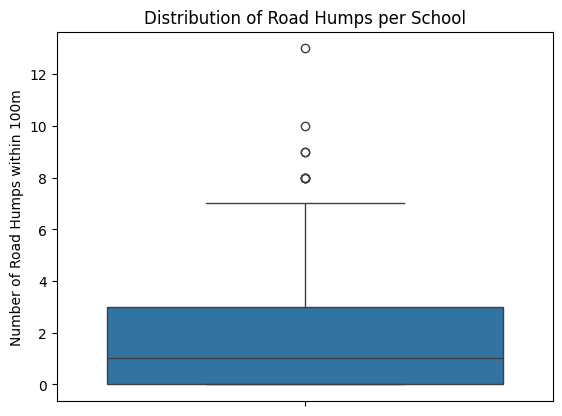

In [133]:
sns.boxplot(roadhump_near_school.groupby("School")["OBJECTID"].count())

plt.title("Distribution of Road Humps per School")
plt.ylabel("Number of Road Humps within 100m")
plt.show()

In [147]:
roadhump_near_school.groupby("School")["OBJECTID"].count().describe()

count    206.000000
mean       1.762136
std        2.266775
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       13.000000
Name: OBJECTID, dtype: float64

In [90]:
speedstrip=gpd.read_file("./datasets/SpeedRegulatingStrip.shp")

In [91]:
speedstrip.head()

,OBJECTID,geometry
0,127,"LINESTRING (14795.516 44292.26, 14791.177 4428..."
1,128,"LINESTRING (15137.592 37168.163, 15136.309 371..."
2,129,"LINESTRING (15103.585 37161.504, 15102.122 371..."
3,130,"LINESTRING (15945.15 35430.981, 15952.172 3543..."
4,131,"LINESTRING (9815.245 33567.666, 9814.69 33579...."


In [92]:
speedstrip_near_school = gpd.sjoin(schoolzone, speedstrip, how="left", predicate="intersects")

In [93]:
speedstrip_near_school.count()

School         251
geometry       251
buffer_100m    251
index_right     80
OBJECTID        80
dtype: int64

In [94]:
speedstrip_near_school.groupby("School").size().sort_values(ascending=False)

School
Ai Tong School                 10
Metta School                    4
Griffiths Primay School         3
Gan Eng Seng Primary School     3
Changkat Changi Primary Sch     3
                               ..
Yu Neng Primary School          1
Yuhua Primary School            1
Zhangde Primary School          1
Zhenghua Primary School         1
Zhonghua Primary School         1
Length: 206, dtype: int64

In [95]:
speedstrip_near_school["object_type"] = "Speed Regulating Strip"
speedstrip_near_school.rename(columns={"index_right": "object_index"}, inplace=True)

In [96]:
speedstrip_near_school.head()

,School,geometry,buffer_100m,object_index,OBJECTID,object_type
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",NaN,NaN,Speed Regulating Strip
1,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137...","POLYGON ((36600.091 32300.772, 36609.614 32302...",NaN,NaN,Speed Regulating Strip
2,Metta School,"POLYGON ((41683.217 36527.433, 41853.609 36513...","POLYGON ((41583.244 36529.731, 41583.923 36539...",325.0,328.0,Speed Regulating Strip
2,Metta School,"POLYGON ((41683.217 36527.433, 41853.609 36513...","POLYGON ((41583.244 36529.731, 41583.923 36539...",464.0,432.0,Speed Regulating Strip
2,Metta School,"POLYGON ((41683.217 36527.433, 41853.609 36513...","POLYGON ((41583.244 36529.731, 41583.923 36539...",181.0,216.0,Speed Regulating Strip


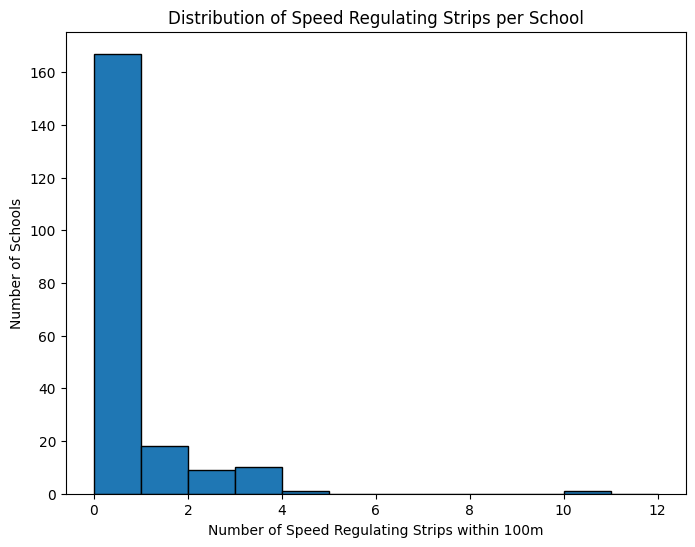

In [97]:
speedstrip_near_school.groupby("School")["OBJECTID"].count().plot.hist(
    bins=range(0, speedstrip_near_school.groupby("School")["OBJECTID"].count().max() + 3), 
    edgecolor="black",
    figsize=(8,6)
)

plt.title("Distribution of Speed Regulating Strips per School")
plt.xlabel("Number of Speed Regulating Strips within 100m")
plt.ylabel("Number of Schools")
plt.show()

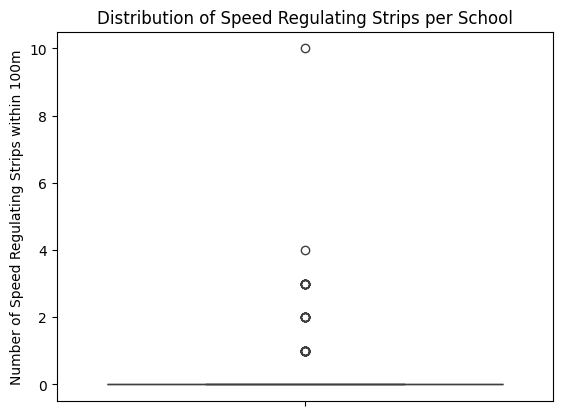

In [134]:
sns.boxplot(speedstrip_near_school.groupby("School")["OBJECTID"].count())

plt.title("Distribution of Speed Regulating Strips per School")
plt.ylabel("Number of Speed Regulating Strips within 100m")
plt.show()

In [146]:
speedstrip_near_school.groupby("School")["OBJECTID"].count().describe()

count    206.00000
mean       0.38835
std        1.05676
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max       10.00000
Name: OBJECTID, dtype: float64

In [98]:
trafficsign = gpd.read_file("./datasets/TrafficSign.shp")

In [99]:
trafficsign.head()

,TYP_CD,BEARG_NUM,MOUNT_MTD_,LVL_NUM,TYP_CD_DES,BEARG_NUM_,MOUNT_MTD1,LVL_NUM_DE,geometry
0,None,70.284797,None,0,No Through Road [3002],None,1-Pole,At-grade,POINT (41318.763 35464.227)
1,None,229.406497,None,0,No Entry [1003],None,1-Pole,At-grade,POINT (41009 35897.478)
2,None,60.000000,None,0,Stop [5001],None,Lamp Post,At-grade,POINT (36637.996 32681.438)
3,None,70.000000,None,0,Stop [5001],None,1-Pole,At-grade,POINT (36691.742 32566.869)
4,None,70.000000,None,0,Slow [2043],None,1-Pole,At-grade,POINT (36815.129 32591.316)


In [100]:
trafficsign_near_school = gpd.sjoin(schoolzone, trafficsign, how="left", predicate="contains")

In [101]:
trafficsign_near_school

,School,geometry,buffer_100m,index_right,TYP_CD,BEARG_NUM,MOUNT_MTD_,LVL_NUM,TYP_CD_DES,BEARG_NUM_,MOUNT_MTD1,LVL_NUM_DE
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",73331,None,110.492595,None,0,Parking Places [3012],None,2-Pole,At-grade
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",108508,None,89.278440,None,0,Pedestrian Crossing Prohibition (graphic with ...,None,1-Pole,At-grade
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",108504,None,270.000000,None,0,Raised Zebra Crossing Ahead [2053],None,1-Pole,At-grade
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",34487,None,89.371684,None,0,No Through Road [3002],None,1-Pole,At-grade
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",30108,None,91.273030,None,0,To HDB Carpark Only [4056],None,1-Pole,At-grade
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Springdale Primary School,"POLYGON ((34385.53 41818.258, 34357.157 41822....","POLYGON ((34264.982 41861.734, 34274.391 41933...",74226,None,189.453138,None,0,Directional Arrows (single headed) [4006],None,1-Pole,At-grade
210,Springdale Primary School,"POLYGON ((34385.53 41818.258, 34357.157 41822....","POLYGON ((34264.982 41861.734, 34274.391 41933...",72725,None,95.642761,None,0,Pedestrian Crossing Prohibition (graphic with ...,None,1-Pole,At-grade
210,Springdale Primary School,"POLYGON ((34385.53 41818.258, 34357.157 41822....","POLYGON ((34264.982 41861.734, 34274.391 41933...",44451,None,8.801706,None,0,"Street Name Single-Sided, Non-Ethnic [6001]",None,1-Pole,At-grade
210,Springdale Primary School,"POLYGON ((34385.53 41818.258, 34357.157 41822....","POLYGON ((34264.982 41861.734, 34274.391 41933...",72745,None,9.569626,None,0,Directional Arrows (single headed) [4006],None,1-Pole,At-grade


In [102]:
trafficsign_near_school.drop(columns=["TYP_CD","BEARG_NUM", "MOUNT_MTD_", "LVL_NUM", "BEARG_NUM_", "MOUNT_MTD1", "LVL_NUM", "LVL_NUM_DE"], inplace=True)

In [103]:
trafficsign_near_school["object_type"] = "Traffic Sign"
trafficsign_near_school.rename(columns={"index_right": "object_index"}, inplace=True)

In [104]:
trafficsign_near_school.head()

,School,geometry,buffer_100m,object_index,TYP_CD_DES,object_type
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",73331,Parking Places [3012],Traffic Sign
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",108508,Pedestrian Crossing Prohibition (graphic with ...,Traffic Sign
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",108504,Raised Zebra Crossing Ahead [2053],Traffic Sign
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",34487,No Through Road [3002],Traffic Sign
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",30108,To HDB Carpark Only [4056],Traffic Sign


In [105]:
trafficsign_near_school.dtypes

School            object
geometry        geometry
buffer_100m     geometry
object_index       int64
TYP_CD_DES        object
object_type       object
dtype: object

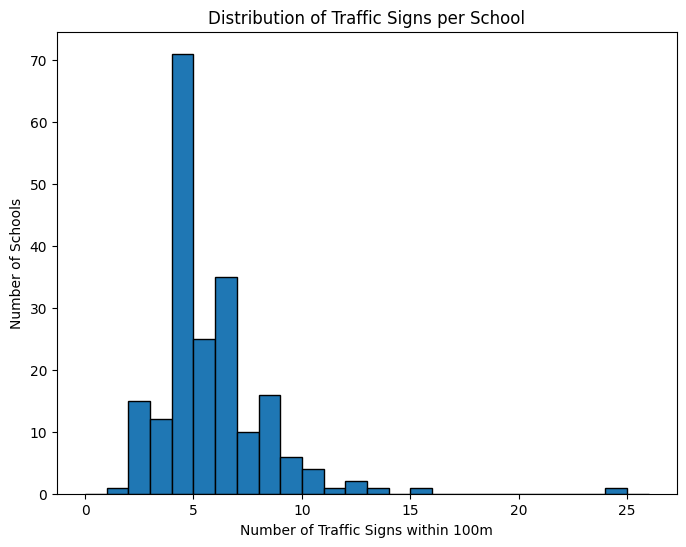

In [106]:
trafficsign_near_school[trafficsign_near_school["TYP_CD_DES"].str.
contains("School", case=False, na=False)].groupby("School")["object_index"].count().plot.hist(
    bins=range(0, int(trafficsign_near_school[trafficsign_near_school["TYP_CD_DES"].str.
    contains("School", case=False, na=False)].groupby("School")["object_index"].count().max())+ 3), 
    edgecolor="black",
    figsize=(8,6)
)

plt.title("Distribution of Traffic Signs per School")
plt.xlabel("Number of Traffic Signs within 100m")
plt.ylabel("Number of Schools")
plt.show()

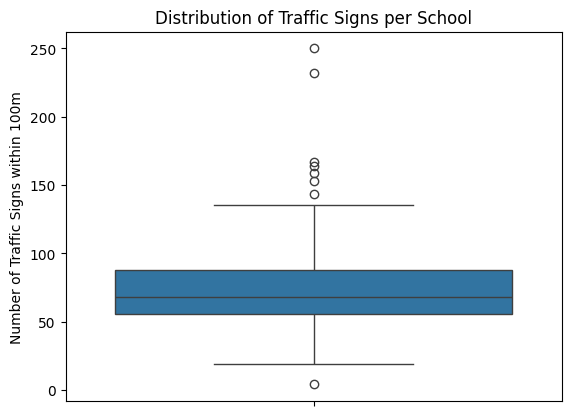

In [139]:
sns.boxplot(trafficsign_near_school.groupby("School")["object_index"].count())

plt.title("Distribution of Traffic Signs per School")
plt.ylabel("Number of Traffic Signs within 100m")
plt.show()

In [145]:
trafficsign_near_school.groupby("School")["object_index"].count().describe()

count    206.000000
mean      74.063107
std       31.340940
min        4.000000
25%       55.250000
50%       68.000000
75%       87.750000
max      250.000000
Name: object_index, dtype: float64

In [107]:
wordmarking = gpd.read_file("./datasets/WordMarking.shp")

In [108]:
wordmarking.head()

,DESC_TXT,BEARG_NUM,LVL_NUM,BEARG_NUM_,LVL_NUM_DE,DESC_TXT_D,geometry
0,None,195.363276,0,None,At-grade,LOOK LEFT RIGHT ARROW,POINT (30530.986 38809.887)
1,None,34.000000,0,None,At-grade,HUMP,POINT (20887.633 47731.339)
2,None,142.471538,0,None,At-grade,HUMP,POINT (25595.069 35934.373)
3,None,260.232352,0,None,At-grade,AHEAD,POINT (17671.972 35738.342)
4,None,67.531118,0,None,At-grade,SLOW,POINT (24462.994 47573.461)


In [109]:
wordmarking.count()

DESC_TXT         22
BEARG_NUM     27556
LVL_NUM       27556
BEARG_NUM_        0
LVL_NUM_DE    27553
DESC_TXT_D    27534
geometry      27556
dtype: int64

In [110]:
wordmarking_near_school = gpd.sjoin(schoolzone, wordmarking, how="left", predicate="contains")

In [111]:
wordmarking_near_school.drop(columns=["DESC_TXT","BEARG_NUM", "LVL_NUM", "BEARG_NUM_", "LVL_NUM_DE", "DESC_TXT_D"], inplace=True)

In [112]:
wordmarking_near_school["OBJECTID"] = np.nan
wordmarking_near_school["object_type"] = "Word Marking"
wordmarking_near_school.rename(columns={"index_right": "object_index"}, inplace=True)

In [113]:
wordmarking_near_school.head()

,School,geometry,buffer_100m,object_index,OBJECTID,object_type
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",5600.0,NaN,Word Marking
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",9009.0,NaN,Word Marking
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",4690.0,NaN,Word Marking
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",20255.0,NaN,Word Marking
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",20253.0,NaN,Word Marking


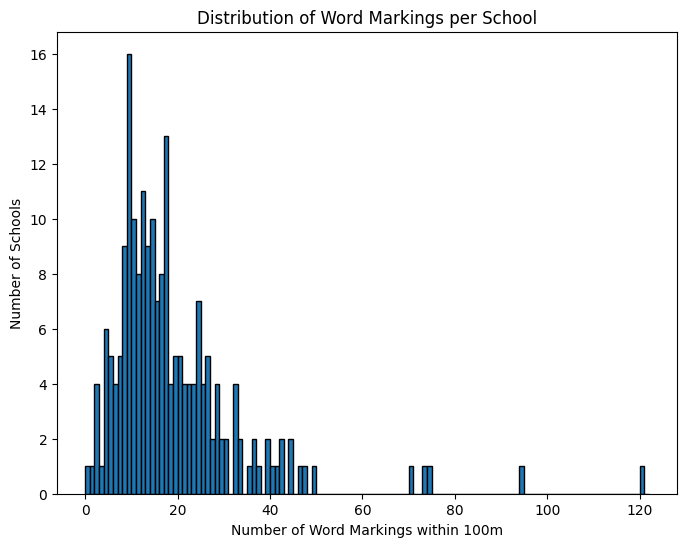

In [114]:
wordmarking_near_school.groupby("School")["object_index"].count().plot.hist(
    bins=range(0, wordmarking_near_school.groupby("School")["object_index"].count().max() + 3), 
    edgecolor="black",
    figsize=(8,6)
)

plt.title("Distribution of Word Markings per School")
plt.xlabel("Number of Word Markings within 100m")
plt.ylabel("Number of Schools")
plt.show()

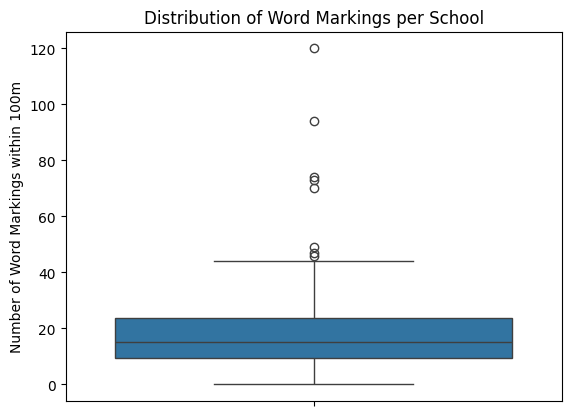

In [149]:
sns.boxplot(wordmarking_near_school.groupby("School")["object_index"].count())

plt.title("Distribution of Word Markings per School")
plt.ylabel("Number of Word Markings within 100m")
plt.show()

In [150]:
wordmarking_near_school.groupby("School")["object_index"].count().describe()

count    206.000000
mean      18.553398
std       14.941334
min        0.000000
25%        9.250000
50%       15.000000
75%       23.750000
max      120.000000
Name: object_index, dtype: float64

In [115]:
full_data = pd.concat([roadcrossing_near_school, roadhump_near_school, speedstrip_near_school, trafficsign_near_school, wordmarking_near_school], ignore_index=True)
full_data.head()

,School,geometry,buffer_100m,object_index,OBJECTID,object_type,TYP_CD_DES
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",1049.0,1040.0,Road Crossing,NaN
1,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",1059.0,1050.0,Road Crossing,NaN
2,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...","POLYGON ((40748.934 38049.733, 40752.796 38058...",1055.0,1046.0,Road Crossing,NaN
3,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137...","POLYGON ((36600.091 32300.772, 36609.614 32302...",NaN,NaN,Road Crossing,NaN
4,Metta School,"POLYGON ((41683.217 36527.433, 41853.609 36513...","POLYGON ((41583.244 36529.731, 41583.923 36539...",2254.0,2305.0,Road Crossing,NaN


In [116]:
full_data.drop(columns="buffer_100m", inplace=True)

In [117]:
full_data.to_file("schools_and_features.geojson", driver="GeoJSON")

In [118]:
full_data.set_geometry("geometry", inplace=True)

In [119]:
full_data.head()

,School,geometry,object_index,OBJECTID,object_type,TYP_CD_DES
0,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...",1049.0,1040.0,Road Crossing,NaN
1,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...",1059.0,1050.0,Road Crossing,NaN
2,Tampines North Primary School,"POLYGON ((40842.783 38015.203, 40867.289 38008...",1055.0,1046.0,Road Crossing,NaN
3,Chij (Katong) Primary School,"POLYGON ((36626.088 32204.211, 36651.952 32137...",NaN,NaN,Road Crossing,NaN
4,Metta School,"POLYGON ((41683.217 36527.433, 41853.609 36513...",2254.0,2305.0,Road Crossing,NaN


In [120]:
full_data.to_crs(epsg=4326, inplace=True)

In [121]:
full_data["center"] = full_data.geometry.centroid

In [122]:
full_data["longitude"] = full_data.geometry.centroid.x
full_data["latitude"] = full_data.geometry.centroid.y

In [124]:
full_data.to_csv("schools_and_features.csv", index=False)